# Importing Relevant Libraries

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Loading the Datasets

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

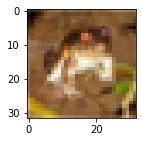

In [5]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#### Converting it to 1D array for our classification

In [8]:
y_train = y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Visualization Of images

In [10]:
def show_image(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

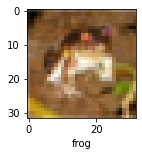

In [11]:
show_image(X_train, y_train , 0)

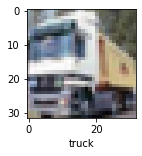

In [12]:
show_image(X_train, y_train , 1)

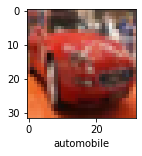

In [13]:
show_image(X_train, y_train , 5)

In [14]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Normalizing by dividing by 255

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Building a simple ANN  

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 62ms/step - loss: 1.9341 - accuracy: 0.3021
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6421 - accuracy: 0.4199
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5624 - accuracy: 0.4490
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4915 - accuracy: 0.4753
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4396 - accuracy: 0.4932


#### Accuracy is 49 percent for ANN with 5 epochs

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.49      0.51      1000
           1       0.66      0.51      0.58      1000
           2       0.44      0.13      0.20      1000
           3       0.36      0.31      0.34      1000
           4       0.37      0.52      0.43      1000
           5       0.49      0.24      0.32      1000
           6       0.42      0.71      0.53      1000
           7       0.64      0.46      0.53      1000
           8       0.42      0.81      0.55      1000
           9       0.58      0.50      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



### designing  Convulational nueral Network

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 33ms/step - loss: 1.6791 - accuracy: 0.3891
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1319 - accuracy: 0.60360s - loss:
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9915 - accuracy: 0.6533
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8963 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8192 - accuracy: 0.7159
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7695 - accuracy: 0.73471s
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7071 - accuracy: 0.7542
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6637 - accuracy: 0.76941s - l
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6234 - accuracy: 0.7840
Epoch 10/10
1563/1563 [=======================

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 16ms/step - loss: 0.9665 - accuracy: 0.6952


[0.9664607644081116, 0.6952000260353088]

In [33]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

array([[9.5727330e-04, 2.3314977e-04, 1.9409646e-04, 9.8100817e-01,
        6.3658044e-06, 1.5040202e-02, 5.0253747e-04, 2.2032870e-04,
        1.7552531e-03, 8.2627521e-05],
       [4.6140085e-05, 3.2513477e-02, 7.0458888e-09, 1.6203343e-08,
        4.5072057e-11, 1.4513435e-10, 2.3028900e-11, 1.5016171e-08,
        9.6741867e-01, 2.1724540e-05],
       [1.0356142e-02, 2.9212944e-02, 2.2358206e-04, 2.9123162e-03,
        5.0811900e-04, 1.4659863e-04, 1.0955046e-04, 1.5080934e-05,
        9.5593917e-01, 5.7649595e-04],
       [9.6018630e-01, 9.5123155e-03, 9.2040626e-03, 3.8084909e-03,
        4.8601017e-03, 1.3364445e-04, 3.9772963e-04, 6.6019985e-04,
        1.0726366e-02, 5.1057315e-04],
       [8.5046118e-08, 2.3296492e-07, 2.1170767e-02, 2.4783464e-02,
        9.0930682e-01, 2.1321890e-03, 4.2591546e-02, 3.3283934e-06,
        1.1512480e-05, 2.6416354e-08]], dtype=float32)

In [36]:
y_classes_pred = [np.argmax(element)for element in y_pred_cnn]

In [37]:
y_classes_pred[:5]

[3, 8, 8, 0, 4]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [42]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

 # Results of Image classification

In [44]:
def classify_images(X,index):
    print('THE CLASSIFICATION Of IMAGES')
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y_classes_pred[index]])

THE CLASSIFICATION Of IMAGES


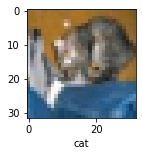

In [45]:
classify_images(X_test,0)

THE CLASSIFICATION Of IMAGES


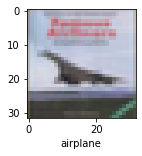

In [46]:
classify_images(X_test,3)

THE CLASSIFICATION Of IMAGES


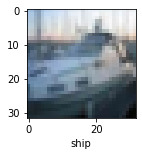

In [49]:
classify_images(X_test,2)

THE CLASSIFICATION Of IMAGES


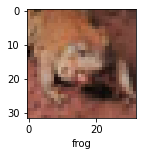

In [48]:
classify_images(X_test,5)

THE CLASSIFICATION Of IMAGES


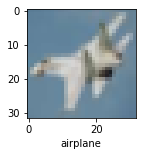

In [50]:
classify_images(X_test,10)